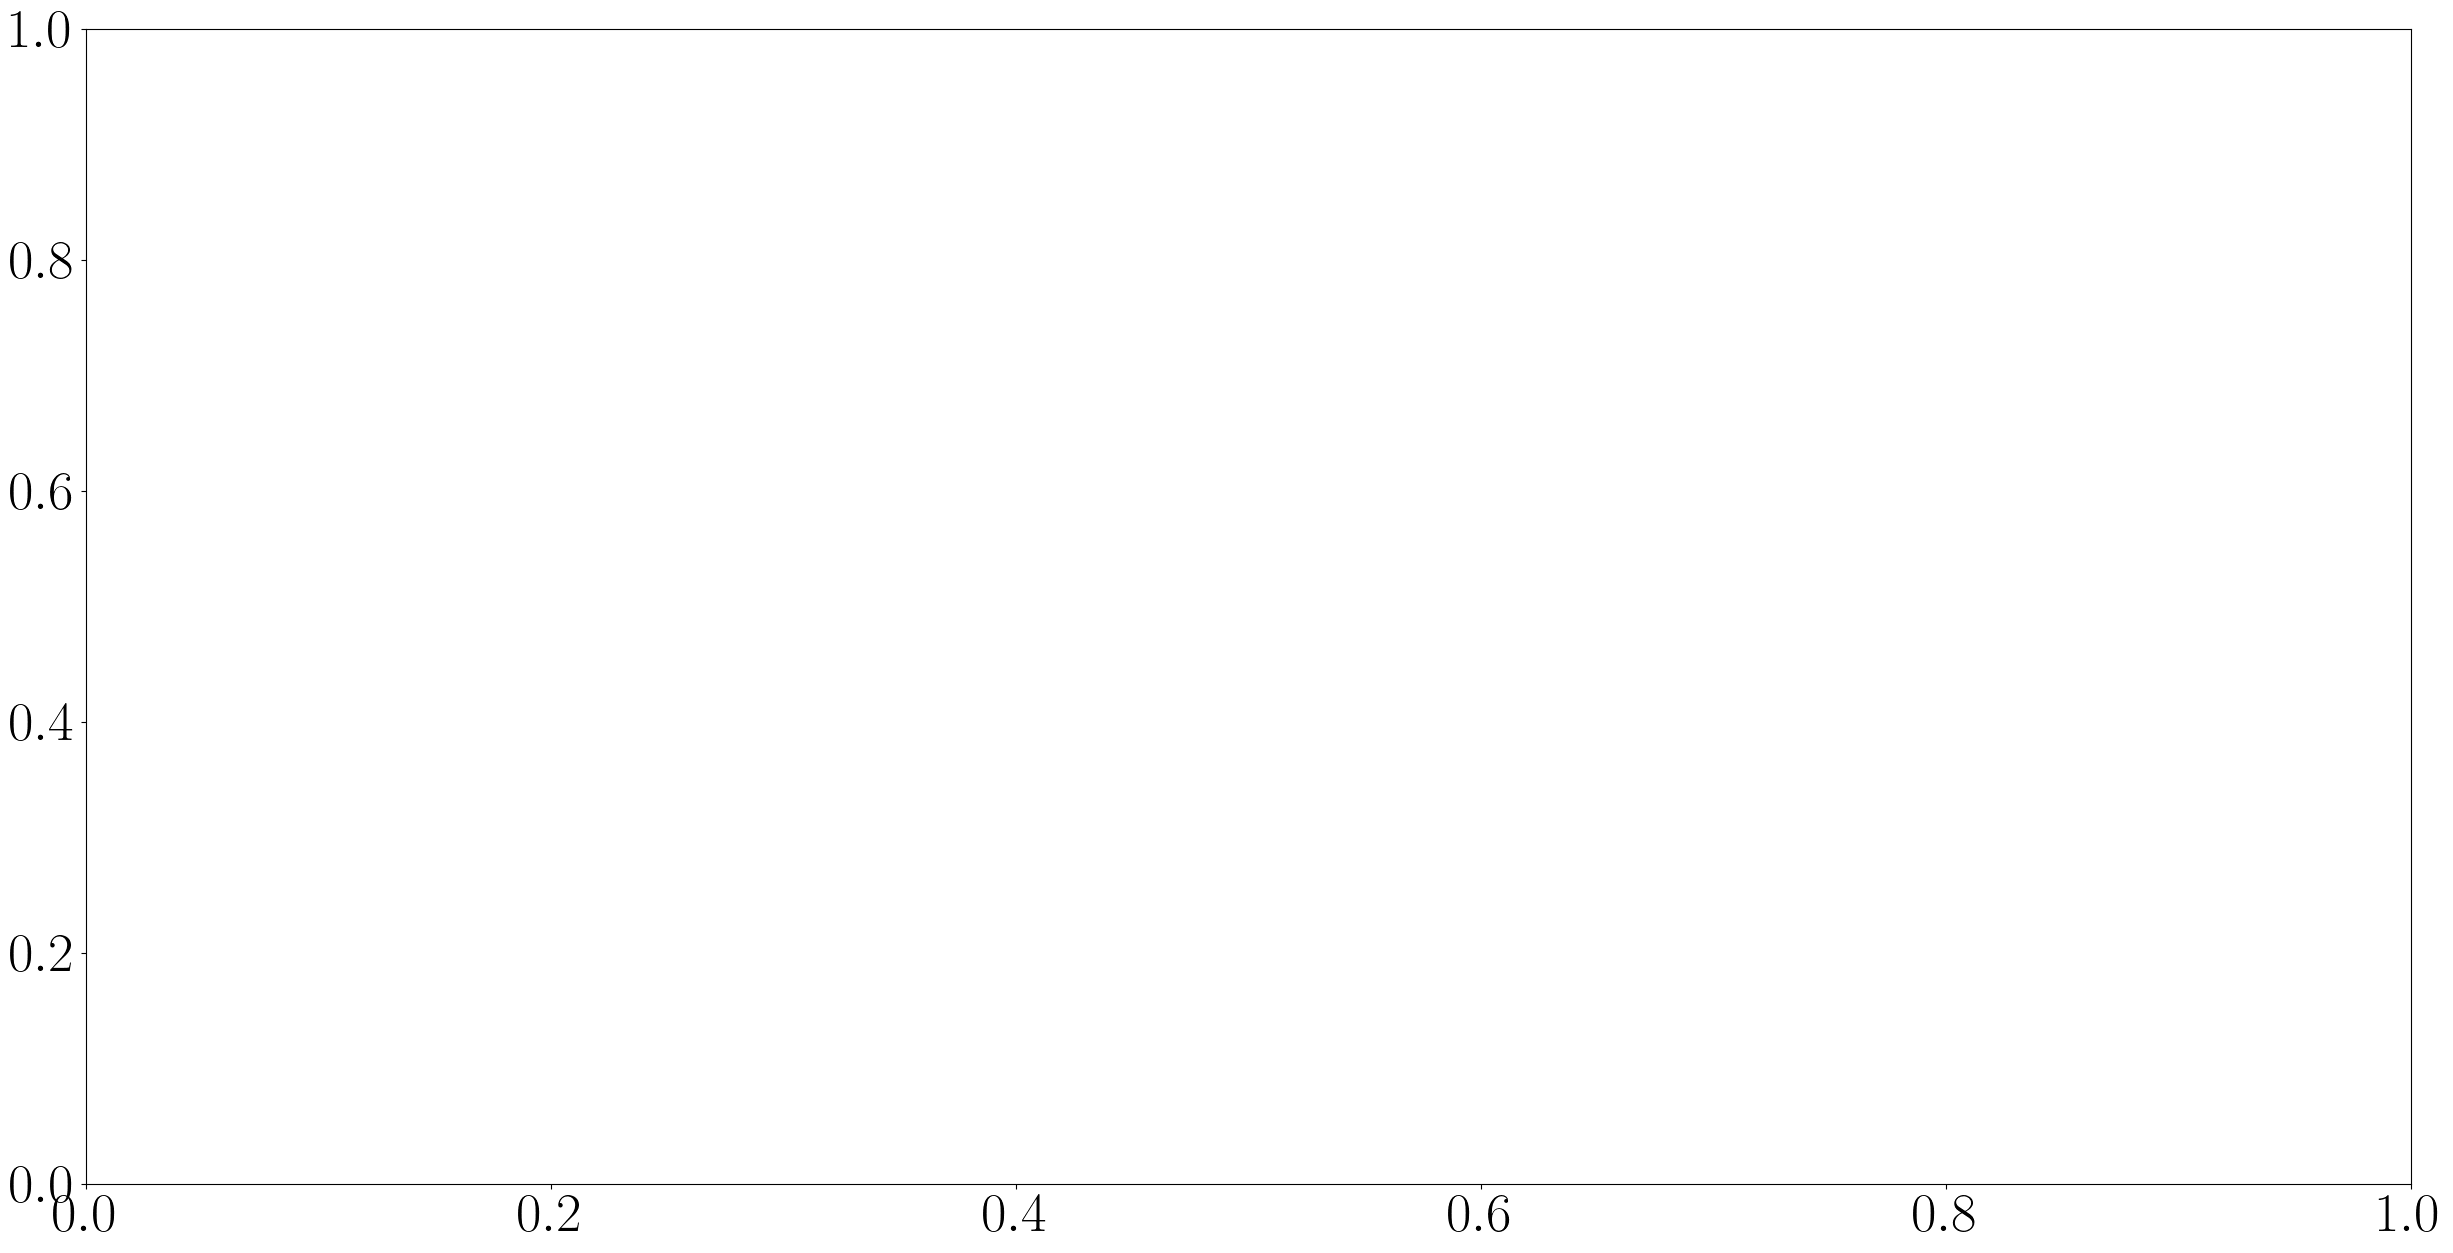

In [1]:
from Binaries import *

Network = NNClassifier("ENSEMBLES/120_LSTM_3L_Downsampled_AllEnergies_5_0VEM/ensemble_03", supress_print = True)

def form_bins(TP, FN, binning):

    # prediction: [SPD, E, Theta, n_mu, n_e, n_p]
    if binning == "E":
        bins = np.geomspace(10**16, 10**19.5, 20)
        TP_values = TP[:, 1]
        FN_values = FN[:, 1]
    
    if binning == "T":
        bins = np.linspace(0, 65, 20)
        TP_values = TP[:, 2]
        FN_values = FN[:, 2]
    if binning == "S":
        bins = np.linspace(0, 5000, 20)
        TP_values = TP[:, 0]
        FN_values = FN[:, 0]

    TP_bins, edges = np.histogram(TP_values, bins = bins)
    FN_bins, edges = np.histogram(FN_values, bins = bins)

    return TP_bins / (TP_bins + FN_bins), edges

def draw_bins(ys, xs, ax, **kwargs):

    ax.plot([xs[0], xs[1]], [ys[0], ys[0]], **kwargs)
    # ax.plot([xs[-1], xs[-1]], [ys[-1], 0], **kwargs)
    # ax.plot([xs[0], xs[0]], [0, ys[0]], **kwargs)

    for i in range(1, len(ys)):
        ax.plot([xs[i], xs[i]], [ys[i-1], ys[i]], **kwargs)
        ax.plot([xs[i], xs[i + 1]], [ys[i], ys[i]], **kwargs)

ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   permutation_0                         15744    4263       0   34328 -> ACC =  28.98%
ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   permutation_1                         15727    4281       0   34345 -> ACC =  28.93%
ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   permutation_2                         15734    4265       0   34338 -> ACC =  28.96%
ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   permutation_3                         15731    4222       0   34341 -> ACC =  28.97%
ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   permutation_4                         15742    4269       0   34330 -> ACC =  28.97%
ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   permutation_5                         15740    4236       0   34332 -> ACC =  28.98%


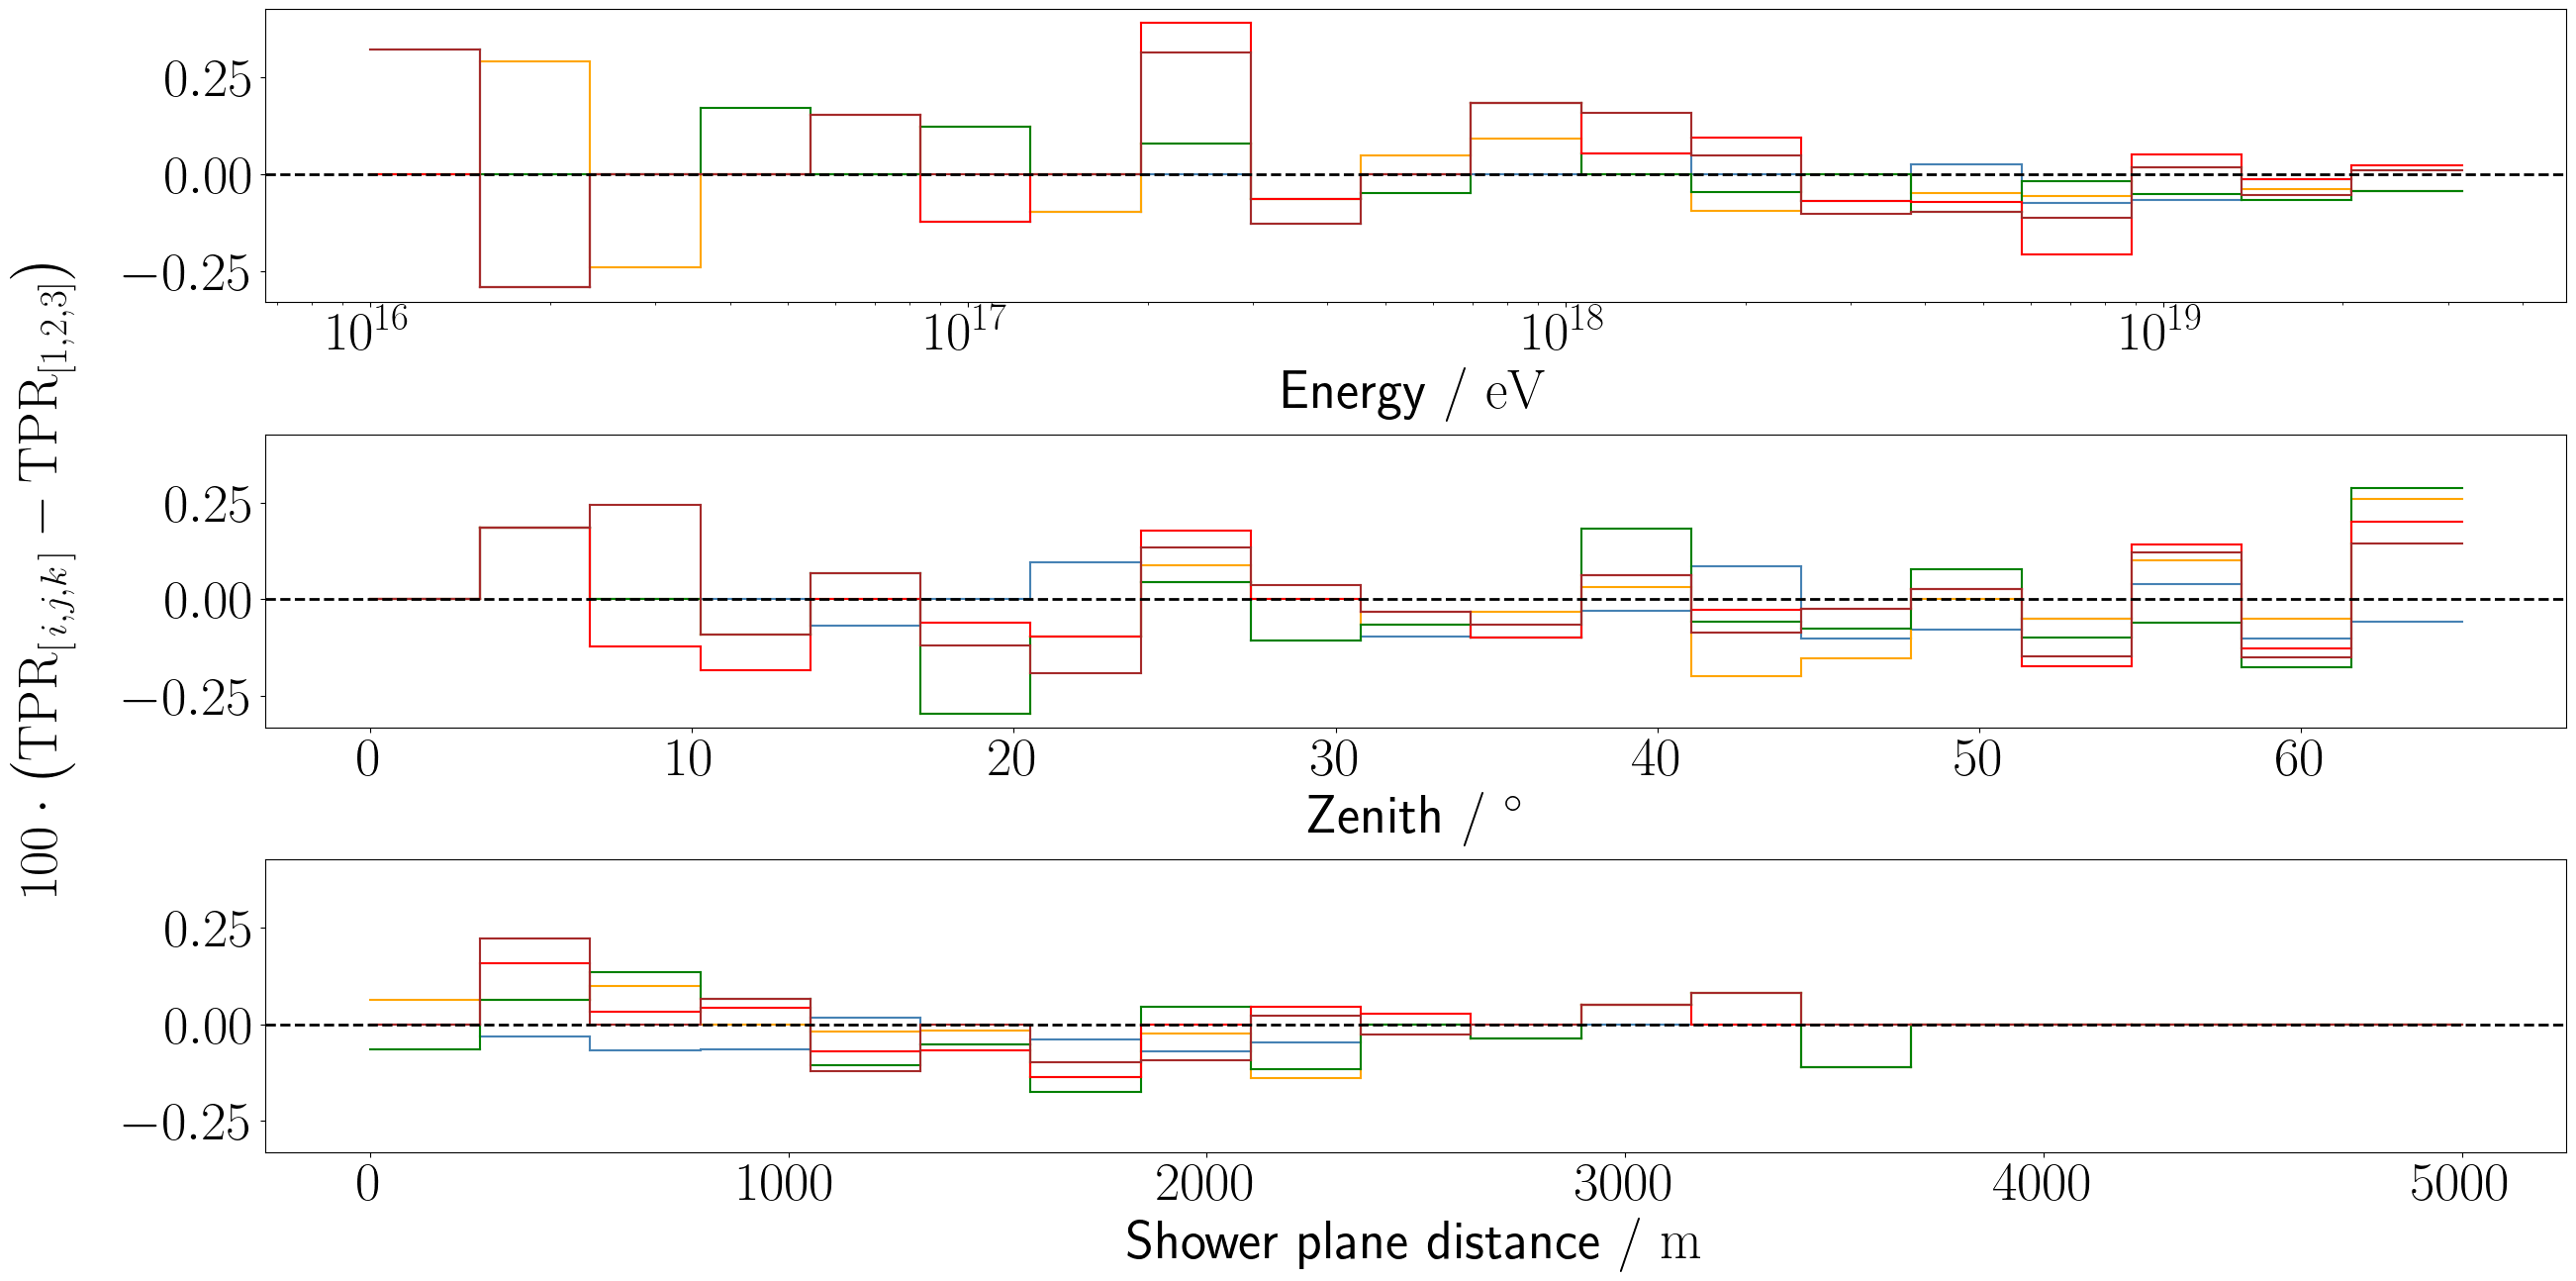

In [9]:
TP0, _, _, FN0 = Network.load_and_print_performance("permutation_0")
color = ["steelblue", "orange", "green", "red", "brown", "purple"]

fig, axes = plt.subplots(3, 1, sharey = True)

for i, perm in enumerate([1, 2, 3, 4, 5]):
    TP, _, _, FN = Network.load_and_print_performance(f"permutation_{perm}")

    for j, bin in enumerate(["E", "T", "S"]):
        eff_ref, bins = form_bins(TP0, FN0, bin)
        eff, bins = form_bins(TP, FN, bin)

        draw_bins( 100 * (eff - eff_ref), bins, axes[j], color = color[i])

axes[0].set_xlabel("Energy / $\mathrm{eV}$")
axes[0].axhline(0, c = "k", ls = "--", lw = 2)
axes[0].set_xscale("log")

axes[1].set_xlabel("Zenith / $^\circ$")
axes[1].axhline(0, c = "k", ls = "--", lw = 2)

axes[2].set_xlabel("Shower plane distance / $\mathrm{m}$")
axes[2].axhline(0, c = "k", ls = "--", lw = 2)

fig.text(0.05, 0.5, r"$100\cdot\left(\mathrm{TPR}_{[\,i, j, k\,]} - \mathrm{TPR}_{[1, 2, 3]}\right)$", verticalalignment = "center", horizontalalignment = "center", rotation = 90)

plt.subplots_adjust(hspace = 0.45)